In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from os.path import join as oj
import seaborn as sns
from tqdm import tqdm

In [2]:
results_dir = '/accounts/projects/vision/chandan/pacmed/results/pmlb'
# depending on how much is saved, this may take a while
# /scratch/users/vision/chandan/pacmed/logistic_basic
out_dir = '/scratch/users/vision/chandan/pacmed/logistic_basic'
fnames = sorted([fname for fname in os.listdir(out_dir)])
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames)]
results = pd.concat(results_list, axis=1).T.infer_objects()

100%|██████████| 52/52 [00:00<00:00, 60.52it/s]


In [3]:
results.head()

,dset_name,seed,class_weight,model_type,flip_frac,out_dir,pid,uncertainty_probit_flipped_diff_train,uncertainty_probit_flipped_diff_p_train,uncertainty_probit_loss_percentages_train,...,uncertainty_probit_calibration_rmse_test,uncertainty_from_pred_flipped_diff_test,uncertainty_from_pred_flipped_diff_p_test,uncertainty_from_pred_loss_percentages_test,uncertainty_from_pred_loss_performances_test,uncertainty_from_pred_loss_auc_test,uncertainty_from_pred_auc_percentages_test,uncertainty_from_pred_auc_performances_test,uncertainty_from_pred_auc_auc_test,uncertainty_from_pred_calibration_rmse_test
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/logistic_...,40237858244104241452,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.178692,0.006463,0.447253,"[17.66304347826087, 17.934782608695652, 18.206...","[0.01386572957381685, 0.01517121920175163, 0.0...",1608.872645,"[17.66304347826087, 17.934782608695652, 18.206...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",82.059113,0.178692
1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/logistic_...,25321537500431160450,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.195963,0.004017,0.354124,"[17.66304347826087, 17.934782608695652, 18.206...","[62.88665472051457, 64.09126461362612, 65.2956...",17493.476016,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6494252873563219, 0.6472222222222223, 0.645...",47.621426,0.195963
2,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/logistic_...,07641306880080624867,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.077993,-0.020633,0.024919,"[17.66304347826087, 17.934782608695652, 18.206...","[62.92749183736094, 63.750815815430784, 64.574...",17504.857051,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6038095238095238, 0.6046296296296296, 0.605...",47.505671,0.077993
3,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/logistic_...,87114021823278057312,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.062717,0.035463,0.005879,"[17.66304347826087, 17.934782608695652, 18.206...","[63.653127873614615, 64.41889883962357, 65.697...",17500.183548,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6062618595825426, 0.6064516129032258, 0.606...",46.979461,0.062717
4,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/logistic_...,13403627254245515601,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.070619,-0.001218,0.446540,"[17.66304347826087, 17.934782608695652, 18.206...","[59.852026063101945, 60.69607336291289, 61.541...",17297.611806,"[17.66304347826087, 17.934782608695652, 18.206...","[0.7222222222222222, 0.7203703703703703, 0.722...",51.884761,0.070619


# compare statistics

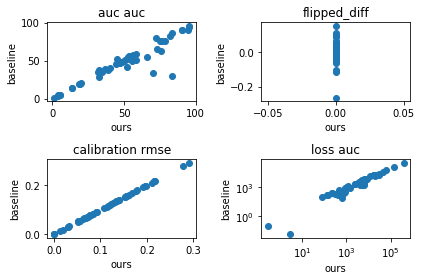

In [4]:
r = results

R, C = 2, 2
plt.subplot(R, C, 1)
plt.title('auc auc')
plt.plot(r.uncertainty_probit_auc_auc_test, r.uncertainty_from_pred_auc_auc_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')


plt.subplot(R, C, 2)
plt.title('flipped_diff')
plt.plot(r.uncertainty_probit_flipped_diff_test, r.uncertainty_from_pred_flipped_diff_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 3)
plt.title('calibration rmse')
plt.plot(r.uncertainty_probit_calibration_rmse_test, r.uncertainty_from_pred_calibration_rmse_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 4)
plt.title('loss auc')
plt.plot(r.uncertainty_probit_loss_auc_test, r.uncertainty_from_pred_loss_auc_test, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.tight_layout()
plt.savefig(oj(results_dir, 'pmlb_results.pdf'))
plt.show()

In [7]:
r['auc_auc_diff'] = r.uncertainty_probit_auc_auc_test - r.uncertainty_from_pred_auc_auc_test

In [ ]:
r2 = r
r2 = r2.sort_values(by='auc_auc_diff', ascending=False)
r2.auc_auc_diff

In [25]:
print('\\begin{tabularx}{\\textwidth}{l X X X X}')
print('Dataset\t&\tClass-weight uncertainty AUC\t&\tUncertainty from pred AUC', end='')
print('\t&\tClass-weight uncertainty loss\t&\tUncertainty from pred loss \\\\')
print('\hline')
for i in range(10):
    row = r2.iloc[i]
    print(f'{row.dset_name}\t&\t{row.uncertainty_probit_auc_auc_test:0.2f}\t&\t{row.uncertainty_from_pred_auc_auc_test:0.2f}', end='')
    print(f'\t&\t{np.log(row.uncertainty_probit_loss_auc_test):0.2f}\t&\t{np.log(row.uncertainty_from_pred_loss_auc_test):0.2f}\\\\')
print('\end{tabularx}')

\begin{tabularx}{\textwidth}{l X X X X}
Dataset	&	Class-weight uncertainty AUC	&	Uncertainty from pred AUC	&	Class-weight uncertainty loss	&	Uncertainty from pred loss \\
\hline
hypothyroid	&	83.32	&	29.30	&	8.79	&	7.83\\
dis	&	70.14	&	33.99	&	8.47	&	7.53\\
coil2000	&	75.82	&	63.30	&	10.35	&	9.84\\
churn	&	66.02	&	54.60	&	10.33	&	10.04\\
banana	&	52.20	&	42.04	&	11.00	&	11.00\\
phoneme	&	72.78	&	65.34	&	10.73	&	10.40\\
flare	&	58.04	&	51.14	&	8.83	&	8.50\\
german	&	55.63	&	49.53	&	8.97	&	8.75\\
mushroom	&	94.92	&	90.12	&	9.99	&	9.66\\
monk1	&	32.31	&	27.79	&	8.40	&	8.41\\
\end{tabularx}
